# Dueling Double Deep Q-Network (DDDQN)
---
Implementation of the agent with OpenAI Gym's LunarLander-v2 environment. The code is based on materials from Udacity Deep Reinforcement Learning Nanodegree Program. 

### 1. Import the Necessary Packages

In [1]:
import gym
!pip install box2d
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(1400, 900))
#display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

     |████████████████████████████████| 1.3MB 13.5MB/s 


### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


### 3. Train the Agent 

Run the code cell below to train the agent from scratch. 

Episode 100	Average Score: -204.10
Episode 200	Average Score: -111.85
Episode 300	Average Score: -77.84
Episode 400	Average Score: 21.60
Episode 500	Average Score: 70.83
Episode 600	Average Score: 171.53
Episode 700	Average Score: 230.42
Episode 800	Average Score: 232.77
Episode 900	Average Score: 240.22
Episode 1000	Average Score: 238.93
Episode 1100	Average Score: 255.99
Episode 1200	Average Score: 255.34
Episode 1300	Average Score: 261.60
Episode 1400	Average Score: 268.04
Episode 1500	Average Score: 268.46
Episode 1600	Average Score: 267.71
Episode 1700	Average Score: 241.80
Episode 1800	Average Score: 272.33
Episode 1900	Average Score: 266.31
Episode 2000	Average Score: 267.70
Episode 2100	Average Score: 267.37
Episode 2200	Average Score: 248.74
Episode 2300	Average Score: 200.04
Episode 2400	Average Score: 199.61
Episode 2500	Average Score: 213.33
Episode 2600	Average Score: 239.63
Episode 2700	Average Score: 258.68
Episode 2800	Average Score: 266.45
Episode 2900	Average Score: 2

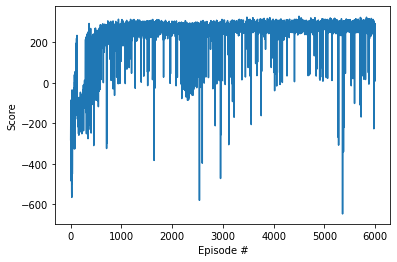

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

def train(n_episodes=6000, max_t=1000, eps_start=0.99, eps_end=0.01, eps_decay=0.97):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        #if np.mean(scores_window)>=200.0:
        #    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        #    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_Dueling_DDQN.pth')
        #    break
    return scores

scores = train(n_episodes=6000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

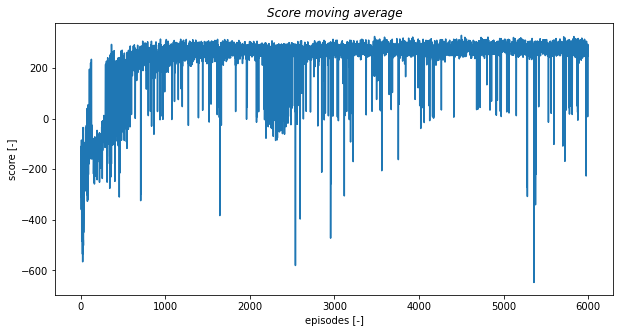

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.xlabel('episodes [-]')
plt.ylabel('score [-]')
plt.title('Score moving average', fontstyle='italic')
plt.plot(np.arange(len(scores)), scores)
plt.savefig('NNGA_2.pdf')  
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [5]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Dueling_DQN.pth', map_location=lambda storage, loc: storage))

for i in range(3):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(200):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

FileNotFoundError: ignored